In [1]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
X = pd.read_csv('../data/total.csv', index_col='Unnamed: 0')

In [3]:
X_feature = X[['청년 비율','세대수 중 청년층 1인 가구','청년층 의지할 수 있는 주변인 수(평균)']]

In [27]:
X_feature

,청년 비율,세대수 중 청년층 1인 가구,청년층 의지할 수 있는 주변인 수(평균)
0,0.448560,0.399424,0.389723
1,0.563786,0.378445,0.401177
2,0.500686,0.375977,0.684145
3,0.523320,0.346771,0.246158
4,0.669410,0.587413,0.681052
5,0.565158,0.489510,0.427341
6,0.252401,0.150144,0.433014
7,0.362140,0.366516,0.347440
8,0.091221,0.135335,0.250293
9,0.030864,0.000000,0.000000


In [10]:
scaler = MinMaxScaler()
scaler.fit(X_feature)

MinMaxScaler()

In [11]:
scalerset = scaler.transform(X_feature)

In [13]:
X_feature['청년 비율'] = scalerset[:,0]
X_feature['세대수 중 청년층 1인 가구'] = scalerset[:,1]
X_feature['청년층 의지할 수 있는 주변인 수(평균)'] = scalerset[:,2]

C:\Users\JH\AppData\Local\Temp/ipykernel_24200/4099658648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_feature['청년 비율'] = scalerset[:,0]
C:\Users\JH\AppData\Local\Temp/ipykernel_24200/4099658648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_feature['세대수 중 청년층 1인 가구'] = scalerset[:,1]
C:\Users\JH\AppData\Local\Temp/ipykernel_24200/4099658648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [15]:
kmeans = KMeans(n_clusters=3, random_state=2).fit(X_feature)

In [20]:
kmeans.labels_

array([2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 1, 1, 0,
       2, 2, 0])

In [19]:
la = {X['행정구역(시군구)별'][i]:kmeans.labels_[i] for i in range(len(kmeans.labels_))}
la  #각 행정구가 어떤 클러스터에 속하는지 dictionary화

{'종로구': 2,
 '중구': 2,
 '용산구': 2,
 '성동구': 2,
 '광진구': 1,
 '동대문구': 2,
 '중랑구': 0,
 '성북구': 2,
 '강북구': 0,
 '도봉구': 0,
 '노원구': 0,
 '은평구': 0,
 '서대문구': 1,
 '마포구': 1,
 '양천구': 0,
 '강서구': 2,
 '구로구': 2,
 '금천구': 2,
 '영등포구': 2,
 '동작구': 1,
 '관악구': 1,
 '서초구': 0,
 '강남구': 2,
 '송파구': 2,
 '강동구': 0}

In [22]:
kmeans.cluster_centers_ # 클러스터의 무게중심이 어디인지

array([[0.1252572 , 0.11147676, 0.34945378],
       [0.68491084, 0.64097079, 0.69359113],
       [0.41929584, 0.37049225, 0.47361418]])

In [29]:
kmeans.cluster_centers_[:,0]

array([0.1252572 , 0.68491084, 0.41929584])

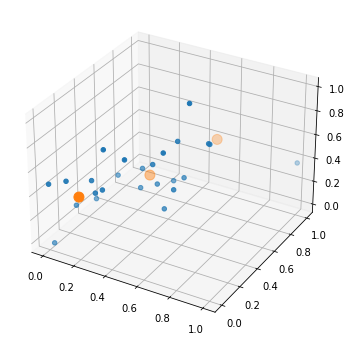

In [30]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


xmin, xmax, ymin, ymax, zmin, zmax = 0, 1, 0, 1, 0, 5
cmin, cmax = 0, 2

xs = X_feature['청년 비율']
ys = X_feature['세대수 중 청년층 1인 가구']
zs = X_feature['청년층 의지할 수 있는 주변인 수(평균)']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, marker='o', s=20, cmap='Greens')
ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2] , s=100)
plt.show()

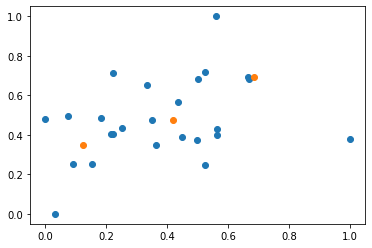

In [31]:
plt.scatter(xs, zs)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2])

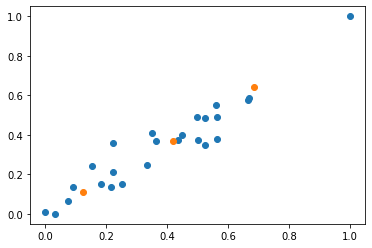

In [32]:
plt.scatter(xs, ys) #청년비율 / 청년 1인가구 비율
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])

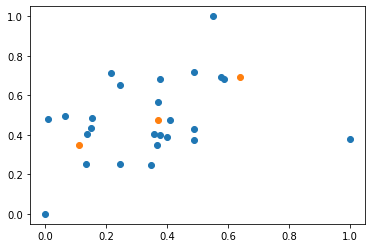

In [33]:
plt.scatter(ys, zs)
plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2])

In [34]:
silhouette_score(X_feature, kmeans.labels_)

0.3481307885587714

In [47]:
sil_score = []
index = []
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, random_state=i+1).fit(X_feature)
    index.append(i)
    sil_score.append(silhouette_score(X_feature, kmeans.labels_))
    print(silhouette_score(X_feature, kmeans.labels_))

0.3849657559960229
0.3481307885587714
0.36584370902497704
0.3769043692914352
0.35871439767210206
0.3002224356801117


In [46]:
import matplotlib.pyplot as plt

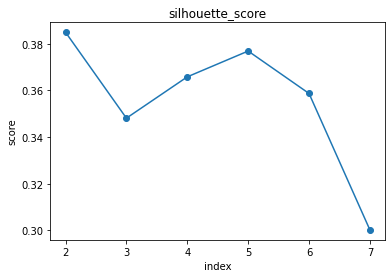

In [55]:
plt.plot(index, sil_score, marker = 'o')

plt.xlabel('index')
plt.ylabel('score')
plt.title('silhouette_score')

plt.show()

In [56]:
from sklearn.cluster import DBSCAN

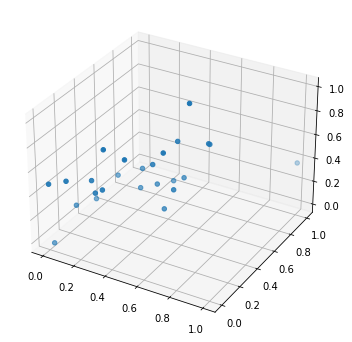

In [76]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, marker='o', s=20, cmap='Greens')
plt.show()

In [68]:
dbscan = DBSCAN(eps = 0.25, min_samples=2)
dbscan.fit(X_feature)

DBSCAN(eps=0.25, min_samples=2)

In [69]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1, -1,  0,  0,  0,  0], dtype=int64)

In [77]:
dbscan.core_sample_indices_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 21, 22, 23, 24], dtype=int64)

In [78]:
dbscan.components_

array([[0.44855967, 0.39942411, 0.38972303],
       [0.56378601, 0.37844508, 0.40117723],
       [0.50068587, 0.37597696, 0.68414546],
       [0.52331962, 0.34677088, 0.24615814],
       [0.66941015, 0.58741259, 0.68105164],
       [0.56515775, 0.48951049, 0.42734072],
       [0.25240055, 0.15014397, 0.43301382],
       [0.36213992, 0.36651584, 0.34743962],
       [0.09122085, 0.13533525, 0.25029349],
       [0.07613169, 0.06499383, 0.49445669],
       [0.18312757, 0.15220074, 0.48272425],
       [0.5260631 , 0.48745372, 0.71698423],
       [0.66666667, 0.57877417, 0.69093015],
       [0.        , 0.00946113, 0.47805646],
       [0.43689986, 0.37186343, 0.5672305 ],
       [0.22290809, 0.2143151 , 0.71175793],
       [0.34979424, 0.40847388, 0.47697713],
       [0.49931413, 0.48992184, 0.37630925],
       [0.15226337, 0.24393254, 0.25494503],
       [0.22359396, 0.35787742, 0.4052507 ],
       [0.33539095, 0.24681201, 0.64986045],
       [0.21604938, 0.13574661, 0.40214051]])